### <center> Лабораторна робота №2_1 <center>

#### Завдання 1 

![task1](task1.png)

Модель:

![model](model.png)

In [1728]:
# Параметри моделі згідно варіанту 6
a = 3.8
b = 1.9
c = 2
d = 1.3
alpha = 0.16
beta = 0.16

In [1729]:
# імпорт бібліотек та функцій для виконання завдання: 
import numpy as np 
import scipy 
from numpy import linspace, array #створення масивів
from pylab import plot, xlabel, ylabel, legend, show #графіки
from scipy.integrate import odeint #функція для інтегрування диф. рівнянь

Користувацькі функції 

In [1730]:
# функція для створення масива початкових значень N1, N2 з типом float
def r_start(x0, y0): 
  x0 = x0 
  y0 = y0
  r0 = np.array([x0, y0], float) 
  return r0

In [1731]:
# функція для розбиття часового інтервала на відліки (рівновіддалені точки)
def ls(N): 
  t0 = 0
  t1 = 20 
  time = linspace(t0, t1, N+1) 
  return time

In [1732]:
# функція для обчислення правих частин системи
def right(r, t, a, b, c, d, alpha, beta):
  x = r[0] # N1 - перший елемент масива 
  y = r[1] # N2 - другий елемент масива
  fx = a*x - b*x*y - alpha*x*x  # перше рівняння
  fy = -c*y + d*x*y - beta*y*y # друге рівняння
  return array([fx, fy], float)

In [1733]:
# функція для розв'язку системи ДР
def dr(time, r0):
  r = odeint(right, r0, time, args = (a, b, c, d, alpha, beta))
  return r

In [1734]:
# функція для побудови графіків 
def pl(time, r):
  plot(time, r[:,0], 'b', label = 'x')
  plot(time,  r[:,1], 'r', label = 'y')
  xlabel('time')
  ylabel('x, y')
  legend()
  show()

In [1735]:
# Початкові значення N1(0), N2(0) задані умовою
r0 = r_start(10, 6)

##### Розв'язки та їх графіки

Крок інтегрування 0.01

In [1736]:
# Масив із значень t від 0 до 20 із кроком 0.01: 
time = ls(2000)

In [1737]:
# Розв'язок ДР 
r = dr(time, r0)

In [1738]:
r[:5] # перші 5 елементів

array([[10.        ,  6.        ],
       [ 9.07632308,  6.59085565],
       [ 8.16048723,  7.1470939 ],
       [ 7.27372162,  7.65331064],
       [ 6.43383122,  8.09760905]])

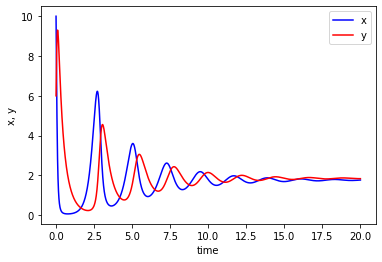

In [1739]:
pl(time, r)

Фазовий портрет

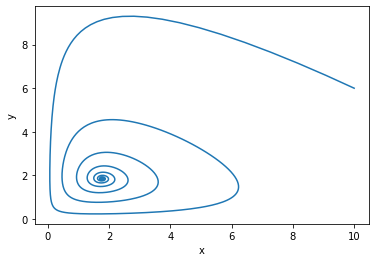

In [1740]:
plot(r[:,0], r[:,1])
xlabel('x')
ylabel('y')
show()

Крок інтегрування 0.1

In [1741]:
time = ls(200)

In [1742]:
r = dr(time, r0)

In [1743]:
r[:5,]

array([[10.        ,  6.        ],
       [ 2.80806987,  9.30152142],
       [ 0.74736201,  8.05813885],
       [ 0.27970369,  6.2503518 ],
       [ 0.14349472,  4.80969305]])

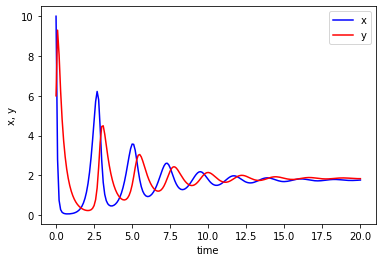

In [1744]:
pl(time, r)

Фазовий портрет

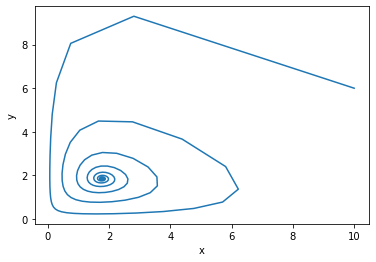

In [1745]:
plot(r[:,0], r[:,1])
xlabel('x')
ylabel('y')
show()

Випадок N1 = 0

In [1746]:
# нові початкові умови: 
r0 = r_start(0, 6)

In [1747]:
# розв'язок: 
r = dr(time, r0)

In [1748]:
r[:5,]

array([[0.        , 6.        ],
       [0.        , 4.51917467],
       [0.        , 3.47242211],
       [0.        , 2.70668248],
       [0.        , 2.13234727]])

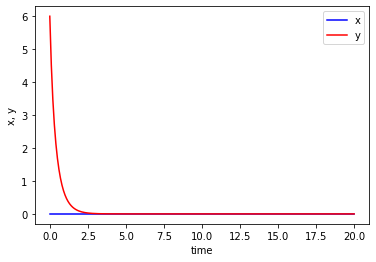

In [1749]:
# графік: 
pl(time, r)

Фазовий портрет

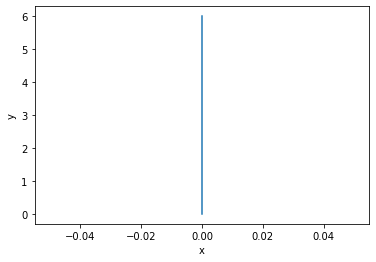

In [1750]:
plot(r[:,0], r[:,1])
xlabel('x')
ylabel('y')
show()

Випадок N2 = 0

In [1751]:
# нові початкові умови: 
r0 = r_start(10, 0)

In [1752]:
# розв'язок: 
r = dr(time, r0)

In [1753]:
r[:5,]

array([[10.        ,  0.        ],
       [12.24031612,  0.        ],
       [14.45490126,  0.        ],
       [16.49590629,  0.        ],
       [18.25899403,  0.        ]])

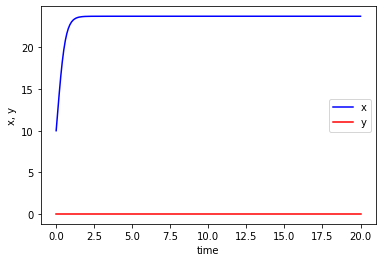

In [1754]:
# графік: 
pl(time, r)

Фазовий портрет

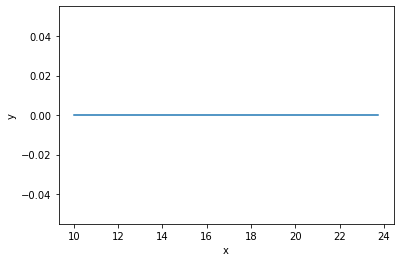

In [1755]:
plot(r[:,0], r[:,1])
xlabel('x')
ylabel('y')
show()

#### Завдання 2

![task5](task2.png)

d + 0.5

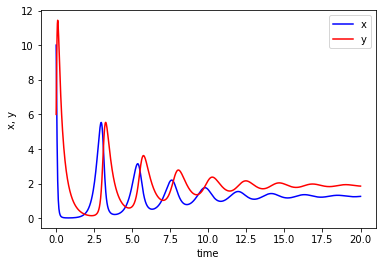

In [1756]:
d+=0.5
r0 = r_start(10, 6)
r = dr(ls(1000), r0)
pl(ls(1000), r)

Фазовий портрет

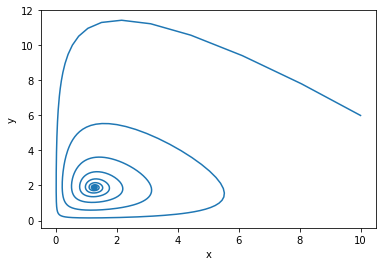

In [1757]:
plot(r[:,0], r[:,1])
xlabel('x')
ylabel('y')
show()

d - 0.5

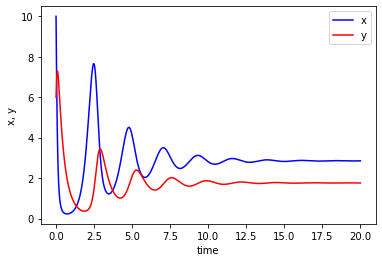

In [1758]:
d=1.3
d-=0.5
r = dr(ls(1000), r0)
pl(ls(1000), r)

Фазовий портрет

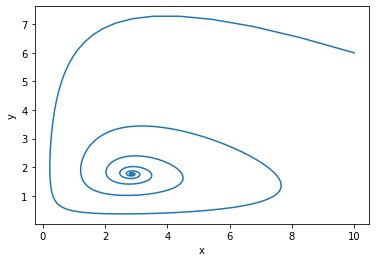

In [1759]:
plot(r[:,0], r[:,1])
xlabel('x')
ylabel('y')
show()

#### Завдання 3

![task3](task3.png)

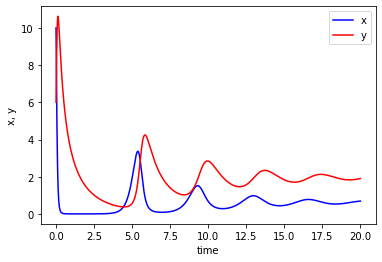

In [1760]:
c = 0.5
d = 1.3
r = dr(ls(1000), r0)
pl(ls(1000), r)

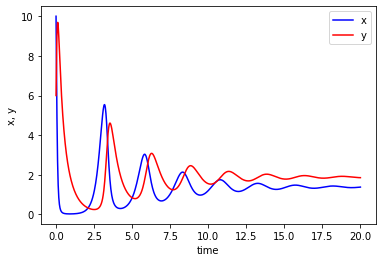

In [1761]:
c = 1.5
r = dr(ls(1000), r0)
pl(ls(1000), r)

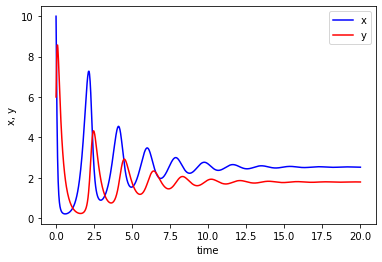

In [1762]:
c = 3
r = dr(ls(1000), r0)
pl(ls(1000), r)

#### Завдання 4

![task4](task4.png)

In [1763]:
# імпорт бібліотек та функцій для завдання: 
import sympy as sym
sym.init_printing() # pretty-printer дозволяє налаштовувати спосіб відображення виразів
from scipy import linalg

In [1764]:
c = 2
# символьні змінні:
x,y = sym.symbols('x,y') 
a1 = sym.Symbol('a1')
b1 = sym.Symbol('b1')
c1 = sym.Symbol('c1')
d1 = sym.Symbol('d1')
alpha1 = sym.Symbol('alpha1') 
beta1 = sym.Symbol('beta1') 

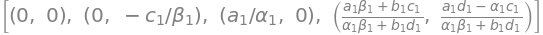

In [1765]:
# вирази: 
f = sym.Eq(a1*x - b1*x*y - alpha1*x*x, 0)
g = sym.Eq(-c1*y + d1*x*y - beta1*y*y, 0)
sym.solve([f,g],(x,y))

In [1766]:
# підставляємо параметри: 
f = sym.Eq(a*x - b*x*y - alpha*x*x, 0)
g = sym.Eq(-c*y + d*x*y - beta*y*y, 0)
sym.solve([f,g], (x,y))

In [1767]:
D = sym.solve([f, g], (x,y))

In [1768]:
coord_list = [v.round(2) for t in D for v in t]
coord_list

Якобіан

In [1769]:
# функція для обчислення Якобіана: 
def Jacobian(v_str, f_list):
    vars = sym.symbols(v_str)
    f = sym.sympify(f_list)
    J = sym.zeros(len(f),len(vars))
    for i, fi in enumerate(f):
        for j, s in enumerate(vars):
            J[i,j] = sym.diff(fi, s)
    return J

In [1770]:
Jacobian('x , y', ['3.8*x - 1.9*x*y-0.16*x*x','-2*y + 1.3*x*y - 0.16*y*y'])

⎡-0.32⋅x - 1.9⋅y + 3.8        -1.9⋅x      ⎤
⎢                                         ⎥
⎣        1.3⋅y          1.3⋅x - 0.32⋅y - 2⎦

Тип особливих точок

In [1771]:
C = np.zeros((2,2))

In [1772]:
# функція для визначення типу особливих точок
def type_point(x, y): 
  C[0,0] = -0.32*x - 1.9*y + 3.8
  C[0,1] = -1.9*x
  C[1,0] = 1.3*y
  C[1,1] = 1.3*x - 0.32*y - 2.
  return np.linalg.eigvals(C) # власні значення

0.0, −12.5

In [1773]:
x = 0.0 
y = -12.5
type_point(x, y)

array([ 2.  , 27.55])

0.0, 0.0

In [1774]:
x = 0.
y = 0.
type_point(x, y)

array([ 3.8, -2. ])

1.77, 1.85

In [1775]:
x = 1.77
y = 1.85
type_point(x, y)

array([-0.2862+2.84393951j, -0.2862-2.84393951j])

23.75, 0.0

In [1776]:
x = 23.75
y = 0.
type_point(x, y)

array([-3.8  , 28.875])

#### Завдання 5

![task5](task5.png)

In [1777]:
# Параметри моделі згідно варіанту 6
a = 3.8
b = 1.9
c = 2
d = 1.3
alpha = 0.16
beta = 0.16

alpha = 0

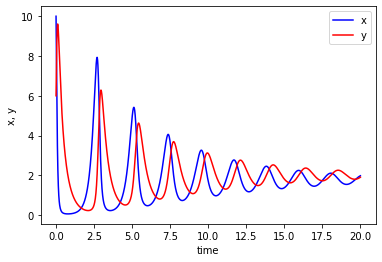

In [1778]:
alpha = 0
time = ls(2000)
r = dr(time, r0)
pl(time, r)

Фазовий портрет

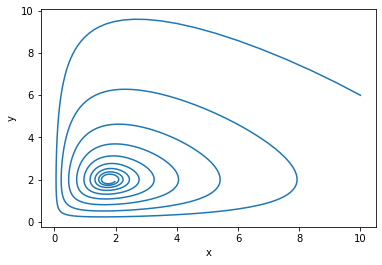

In [1779]:
plot(r[:,0], r[:,1])
xlabel('x')
ylabel('y')
show()

Особливі точки

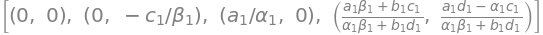

In [1780]:
# символьні змінні:
x,y = sym.symbols('x,y') 
a1 = sym.Symbol('a1')
b1 = sym.Symbol('b1')
c1 = sym.Symbol('c1')
d1 = sym.Symbol('d1')
alpha1 = sym.Symbol('alpha1') 
beta1 = sym.Symbol('beta1') 
# вирази: 
f = sym.Eq(a1*x - b1*x*y - alpha1*x*x, 0)
g = sym.Eq(-c1*y + d1*x*y - beta1*y*y, 0)
sym.solve([f,g],(x,y))

In [1781]:
# підставляємо параметри: 
f = sym.Eq(a*x - b*x*y - alpha*x*x, 0)
g = sym.Eq(-c*y + d*x*y - beta*y*y, 0)
D = sym.solve([f, g], (x,y))

In [1782]:
coord_list = [v.round(2) for t in D for v in t]
coord_list

In [1783]:
Jacobian('x , y', ['3.8*x - 1.9*x*y-0*x*x','-2*y + 1.3*x*y - 0.16*y*y'])

⎡3.8 - 1.9⋅y        -1.9⋅x      ⎤
⎢                               ⎥
⎣   1.3⋅y     1.3⋅x - 0.32⋅y - 2⎦

In [1784]:
C = np.zeros((2,2)) 
x = 0.
y = -12.5
C[0,0] = 3.8-1.9*y
C[0,1] = -1.9*x
C[1,0] = 1.3*y
C[1,1] = 1.3*x - 0.32*y - 2.
np.linalg.eigvals(C) 

array([ 2.  , 27.55])

In [1785]:
x = 0.0
y = 0.0
C[0,0] = 3.8-1.9*y
C[0,1] = -1.9*x
C[1,0] = 1.3*y
C[1,1] = 1.3*x - 0.32*y - 2.
np.linalg.eigvals(C) 

array([ 3.8, -2. ])

In [1786]:
x = 1.78
y = 2.0
C[0,0] = 3.8-1.9*y
C[0,1] = -1.9*x
C[1,0] = 1.3*y
C[1,1] = 1.3*x - 0.32*y - 2.
np.linalg.eigvals(C) 

array([-0.163+2.96084971j, -0.163-2.96084971j])

beta = 0

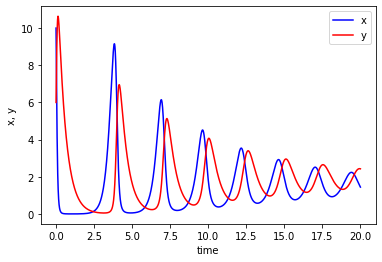

In [1787]:
alpha = 0.16
beta = 0
time = ls(2000)
r = dr(time, r0)
pl(time, r)

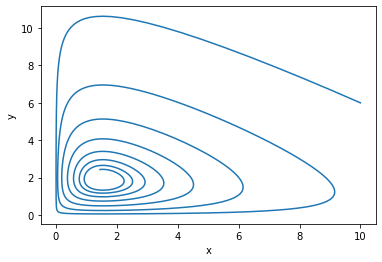

In [1788]:
plot(r[:,0], r[:,1])
xlabel('x')
ylabel('y')
show()

Особливі точки

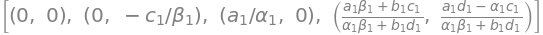

In [1789]:
# символьні змінні:
x,y = sym.symbols('x,y') 
a1 = sym.Symbol('a1')
b1 = sym.Symbol('b1')
c1 = sym.Symbol('c1')
d1 = sym.Symbol('d1')
alpha1 = sym.Symbol('alpha1') 
beta1 = sym.Symbol('beta1') 
# вирази: 
f = sym.Eq(a1*x - b1*x*y - alpha1*x*x, 0)
g = sym.Eq(-c1*y + d1*x*y - beta1*y*y, 0)
sym.solve([f,g],(x,y))

In [1790]:
# підставляємо параметри: 
f = sym.Eq(a*x - b*x*y - alpha*x*x, 0)
g = sym.Eq(-c*y + d*x*y - beta*y*y, 0)
D = sym.solve([f, g], (x,y))

In [1791]:
coord_list = [v.round(2) for t in D for v in t]
coord_list

In [1792]:
Jacobian('x , y', ['3.8*x - 1.9*x*y-0.16*x*x','-2*y + 1.3*x*y - 0*y*y'])

⎡-0.32⋅x - 1.9⋅y + 3.8   -1.9⋅x  ⎤
⎢                                ⎥
⎣        1.3⋅y          1.3⋅x - 2⎦

In [1793]:
x = 0.0
y = 0.0
C[0,0] = 0.32*x-1.9*y+3.8
C[0,1] = -1.9*x
C[1,0] = 1.3*y
C[1,1] = 1.3*x - 0.32*y
np.linalg.eigvals(C) 

array([3.8, 0. ])

In [1794]:
x = 1.54
y = 1.87
C[0,0] = 0.32*x-1.9*y+3.8
C[0,1] = -1.9*x
C[1,0] = 1.3*y
C[1,1] = 1.3*x - 0.32*y
np.linalg.eigvals(C) 

array([1.0717+2.64630845j, 1.0717-2.64630845j])

In [1795]:
x = 23.75
y = 0.0
C[0,0] = 0.32*x-1.9*y+3.8
C[0,1] = -1.9*x
C[1,0] = 1.3*y
C[1,1] = 1.3*x - 0.32*y
np.linalg.eigvals(C) 

array([11.4  , 30.875])

alpha = 0, beta = 0

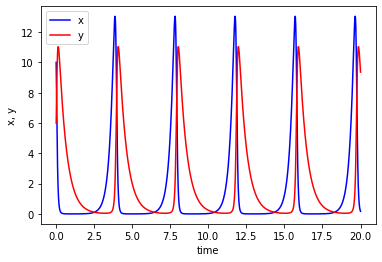

In [1796]:
alpha = 0
beta = 0
time = ls(2000)
r = dr(time, r0)
pl(time, r)

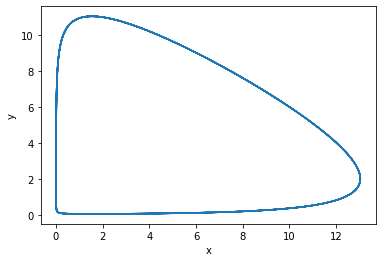

In [1797]:
plot(r[:,0], r[:,1])
xlabel('x')
ylabel('y')
show()

Особливі точки

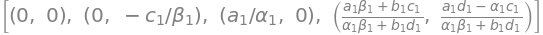

In [1798]:
# символьні змінні:
x,y = sym.symbols('x,y') 
a1 = sym.Symbol('a1')
b1 = sym.Symbol('b1')
c1 = sym.Symbol('c1')
d1 = sym.Symbol('d1')
alpha1 = sym.Symbol('alpha1') 
beta1 = sym.Symbol('beta1') 
# вирази: 
f = sym.Eq(a1*x - b1*x*y - alpha1*x*x, 0)
g = sym.Eq(-c1*y + d1*x*y - beta1*y*y, 0)
sym.solve([f,g],(x,y))

In [1799]:
# підставляємо параметри: 
f = sym.Eq(a*x - b*x*y - alpha*x*x, 0)
g = sym.Eq(-c*y + d*x*y - beta*y*y, 0)
D = sym.solve([f, g], (x,y))

In [1800]:
coord_list = [v.round(2) for t in D for v in t]
coord_list

In [1801]:
Jacobian('x , y', ['3.8*x - 1.9*x*y-0*x*x','-2*y + 1.3*x*y - 0*y*y'])

⎡3.8 - 1.9⋅y   -1.9⋅x  ⎤
⎢                      ⎥
⎣   1.3⋅y     1.3⋅x - 2⎦

In [1802]:
x = 0.0
y = 0.0
C[0,0] = 3.8-1.9*y
C[0,1] = -1.9*x
C[1,0] = 1.3*y
C[1,1] = 1.3*x - 2
np.linalg.eigvals(C) 

array([ 3.8, -2. ])

In [1803]:
x = 1.54
y = 2
C[0,0] = 3.8-1.9*y
C[0,1] = -1.9*x
C[1,0] = 1.3*y
C[1,1] = 1.3*x - 2
np.linalg.eigvals(C) 

array([0.001+2.75818763j, 0.001-2.75818763j])